In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AffinityPropagation

#plt.style.use('tableau-colorblind10')
sns.set(font_scale=0.8)
%matplotlib widget

In [2]:
#Number of agents
N = 4

## Load data

In [3]:
df = pd.read_table("simulation_params_N4.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc'])
df

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_17798/896719246.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_table("simulation_params_N4.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc'])


,efficiency,inequality,n_efficiency,n_inequality,entropy,frequency,info_per_agent,int_entropy,ineq_slope,emax_perc
0,156.187500,155.937616,0.125000,0.124769,0.250000,0.500000,0.50,0.499833,0.062479,0.499833
1,-0.187500,0.272431,-0.093750,0.136216,0.000000,1.000000,0.00,0.000000,0.000000,0.000000
2,208.041667,147.196133,0.124913,0.088388,0.396241,0.333333,1.50,0.666445,0.058916,0.666778
3,-0.312500,0.369755,-0.104167,0.123252,0.000000,1.000000,0.00,0.000000,0.000000,0.000000
4,233.906250,135.046483,0.187067,0.108004,0.250000,0.500000,0.75,0.905337,0.054108,0.500167
...,...,...,...,...,...,...,...,...,...,...
596,155.875000,0.192033,0.249537,0.000355,0.500000,0.250000,2.25,0.655421,0.000010,0.249917
597,156.281250,156.281264,0.124971,0.124971,0.250000,0.500000,0.50,0.811008,0.062479,0.000000
598,155.500000,156.125145,0.124595,0.125174,0.250000,0.500000,0.50,0.499833,0.062479,0.499833
599,78.125000,134.883457,0.062674,0.108153,0.250000,0.500000,0.25,0.405504,0.054109,0.000000


In [4]:
df['efficiency'].describe()

count    601.000000
mean     144.911205
std      108.396143
min       -1.375000
25%        0.250000
50%      156.000000
75%      218.468750
max      312.562500
Name: efficiency, dtype: float64

In [5]:
#data_f = pd.read_csv("data/MFP_4medidas.csv")
#data_f.head()

In [6]:
#df = data_f[['efficiency','entropy','attendance','inequality']]

In [7]:
#df[(df['efficiency']<201) & (df['inequality']<50) & (df['info_per_agent']<=1)]

In [8]:
#df[(df['efficiency']>201) & (df['inequality']>200) & (df['entropy']<=0.1)]

In [9]:
#Filter out data where all agents choose 0 always or all agents choose 1 always
df = df[(df['int_entropy']>0)].reset_index()
#df = df[(df['int_entropy']>0) & (df['info_per_agent']<=N)].reset_index()
#df

## Plot data

<Axes: xlabel='efficiency', ylabel='inequality'>

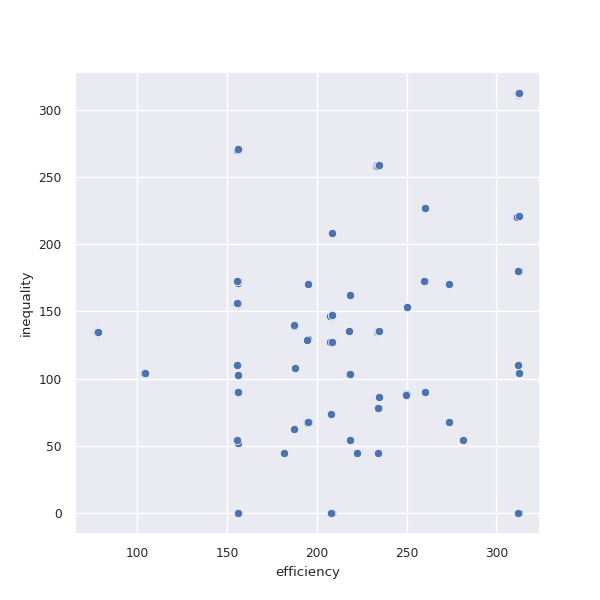

In [10]:
fig0, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=df, ax=ax, x='efficiency', y='inequality')

## Standardize data

In [11]:
#df_std = df[['n_efficiency','n_inequality','entropy','info_per_agent']].apply(lambda x: x-np.mean(x))
#df_std = df_std.apply(lambda x: x/np.std(x))
#df_std.head()

In [12]:
#X_dat = df_std.to_numpy()
#X_dat.shape

In [13]:
df_red = df[['n_efficiency','n_inequality','entropy']]
#scaler = MinMaxScaler()
#scaler.fit(df_red)
X_dat = df_red.to_numpy() #scaler.transform(df_red)
X_dat.shape

(432, 3)

# 2D

## t-sne

In [14]:
from sklearn.manifold import TSNE

In [15]:
# Get t-sne embeding with 2 dimensions
tsne = TSNE(n_components=2,learning_rate='auto',perplexity=30,init='random')
tsne_result = tsne.fit_transform(X_dat)
tsne_result.shape

(432, 2)

In [16]:
df_tsne_res = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1]})
df_tsne_res = df_tsne_res.join(df)
df_tsne_res.head()

,tsne_1,tsne_2,index,efficiency,inequality,n_efficiency,n_inequality,entropy,frequency,info_per_agent,int_entropy,ineq_slope,emax_perc
0,-5.428713,-18.330664,0,156.187500,155.937616,0.125000,0.124769,0.250000,0.500000,0.50,0.499833,0.062479,0.499833
1,16.852423,-5.414954,2,208.041667,147.196133,0.124913,0.088388,0.396241,0.333333,1.50,0.666445,0.058916,0.666778
2,-1.353378,-25.596046,4,233.906250,135.046483,0.187067,0.108004,0.250000,0.500000,0.75,0.905337,0.054108,0.500167
3,30.005915,16.700298,5,312.187500,312.187558,0.124942,0.124942,0.000000,1.000000,0.00,0.999667,0.124958,0.999667
4,9.140059,-5.483374,6,155.697917,90.036639,0.187297,0.108337,0.396241,0.333333,1.50,0.603558,0.036072,0.333555


In [17]:
df_tsne_res[(df_tsne_res['tsne_1']>0) & (df_tsne_res['tsne_1']<100) & (df_tsne_res['tsne_2']>0) & (df_tsne_res['tsne_2']<100)]

,tsne_1,tsne_2,index,efficiency,inequality,n_efficiency,n_inequality,entropy,frequency,info_per_agent,int_entropy,ineq_slope,emax_perc
3,30.005915,16.700298,5,312.18750,312.187558,0.124942,0.124942,0.000000,1.000000,0.00,0.999667,0.124958,0.999667
6,0.116256,22.389011,8,156.01875,103.081525,0.156236,0.103161,0.580482,0.200000,2.00,0.686538,0.041452,0.200267
12,26.253595,18.713316,14,312.56250,312.562500,0.125000,0.125000,0.000000,1.000000,0.00,0.999667,0.124958,0.999667
15,28.277187,15.704354,17,312.56250,312.437529,0.125000,0.124942,0.000000,1.000000,0.00,0.999667,0.124958,0.999667
16,27.534563,14.713807,19,312.18750,311.812645,0.125058,0.124884,0.000000,1.000000,0.00,0.999667,0.124958,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,0.110676,22.662216,568,217.71875,135.778396,0.145656,0.090859,0.580482,0.200000,1.50,0.762002,0.054447,0.599800
406,30.767557,17.381382,571,312.18750,312.312645,0.124884,0.124942,0.000000,1.000000,0.00,0.999667,0.124958,0.999667
413,28.277433,15.704567,579,312.56250,312.437529,0.125000,0.124942,0.000000,1.000000,0.00,0.999667,0.124958,1.000000
426,1.886371,23.677330,595,233.84375,44.957171,0.187558,0.036053,0.646241,0.166667,2.50,0.801612,0.018034,0.666445


emax_perc > 0.95, inequality: segmentation (>0.95*max), alternation (<0.05*max)

In [18]:
mx = df_tsne_res['inequality'].max()
mn = 0.95*mx
nbins = 20
lseg = np.zeros((nbins,nbins))
x = np.linspace(mn,mx,nbins)
y = np.linspace(0.95,1,nbins)
for i in range(nbins):
    for j in range(nbins):
        df_seg = df_tsne_res[(df_tsne_res['inequality']>x[i]) & (df_tsne_res['emax_perc']>y[j])]
        lseg[i,j] = df_seg.shape[0]/df.shape[0]

Text(0.5, 122.24999999999996, 'emax_perc')

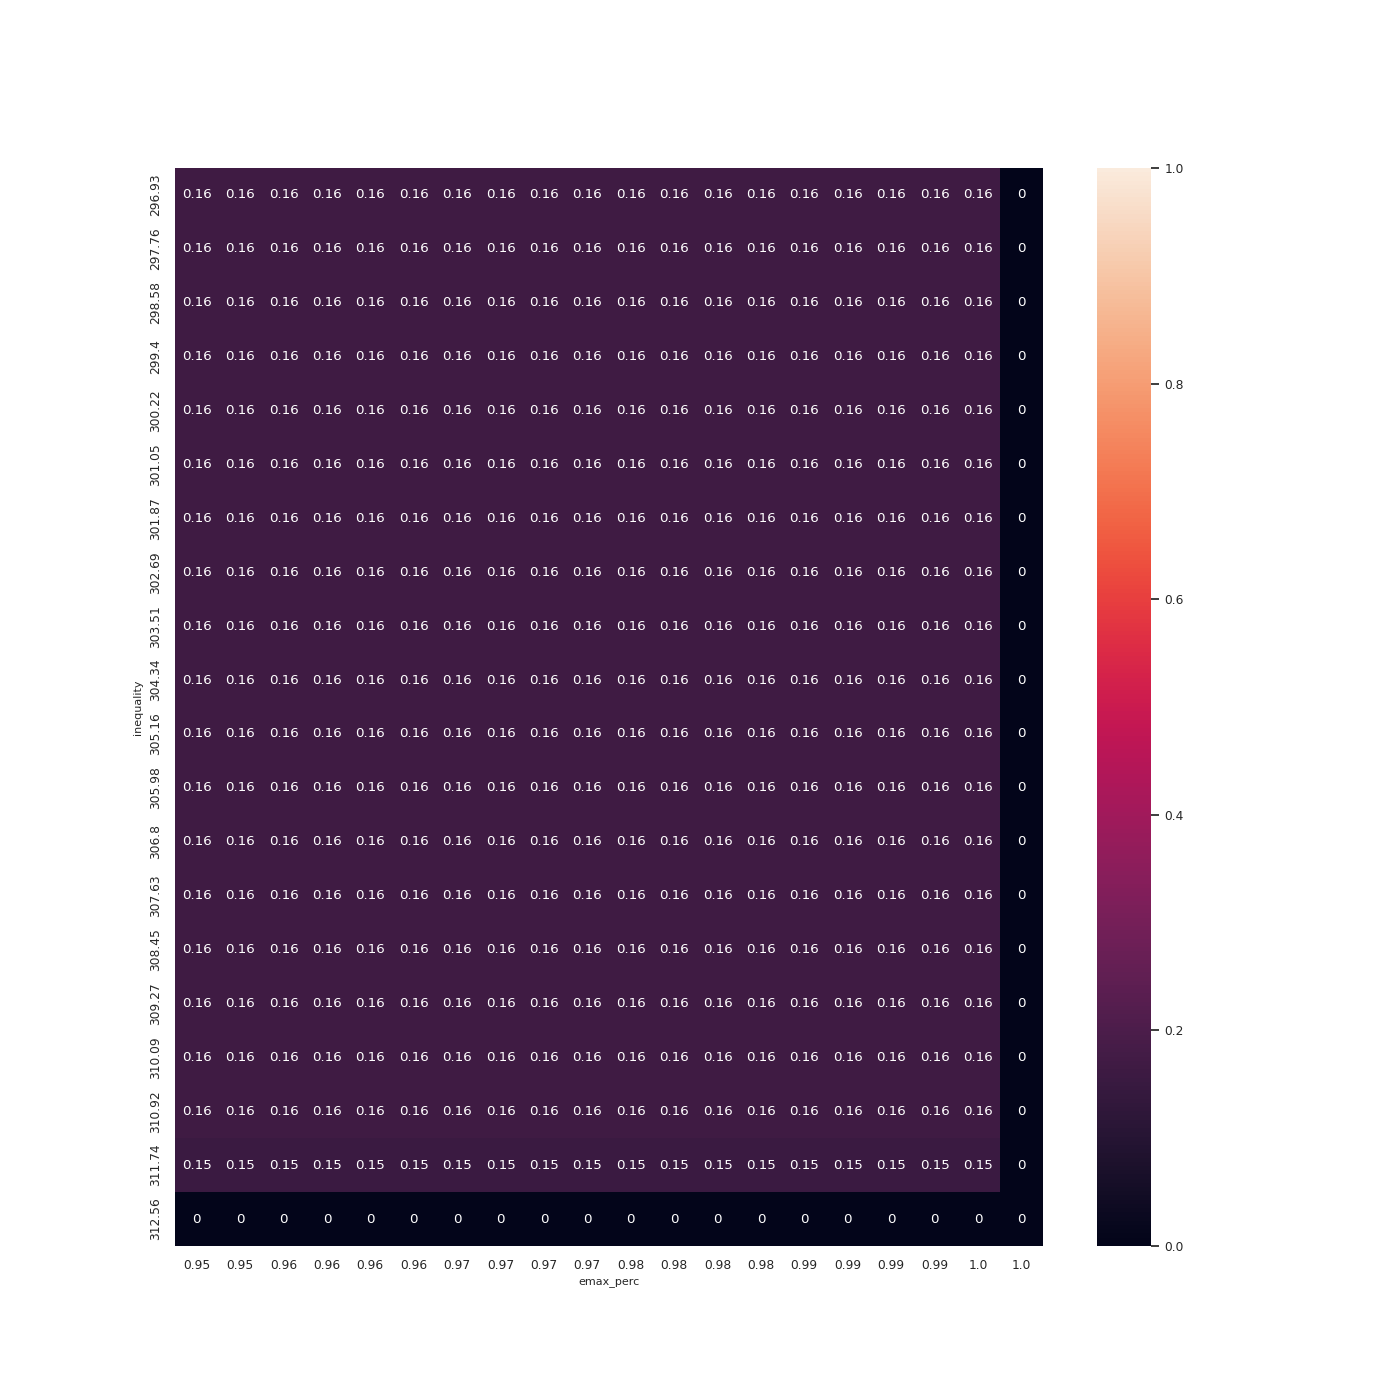

In [19]:
fig0, ax = plt.subplots(figsize=(14,14))
sns.heatmap(lseg, ax=ax, xticklabels=[str(round(i,2)) for i in y],yticklabels=[str(round(i,2)) for i in x], vmin=0,vmax=1,annot=lseg)
ax.set_ylabel('inequality',fontsize=8)
ax.set_xlabel('emax_perc',fontsize=8)

In [20]:
mx = df_tsne_res['inequality'].max()
mn = 0.05*mx
nbins = 20
lalt = np.zeros((nbins,nbins))
x = np.linspace(0,mn,nbins)
y = np.linspace(0.95,1,nbins)
for i in range(nbins):
    for j in range(nbins):
        df_alt = df_tsne_res[(df_tsne_res['inequality']<x[i]) & (df_tsne_res['emax_perc']>y[j])]
        lalt[i,j] = df_alt.shape[0]/df.shape[0]

Text(0.5, 122.24999999999996, 'emax_perc')

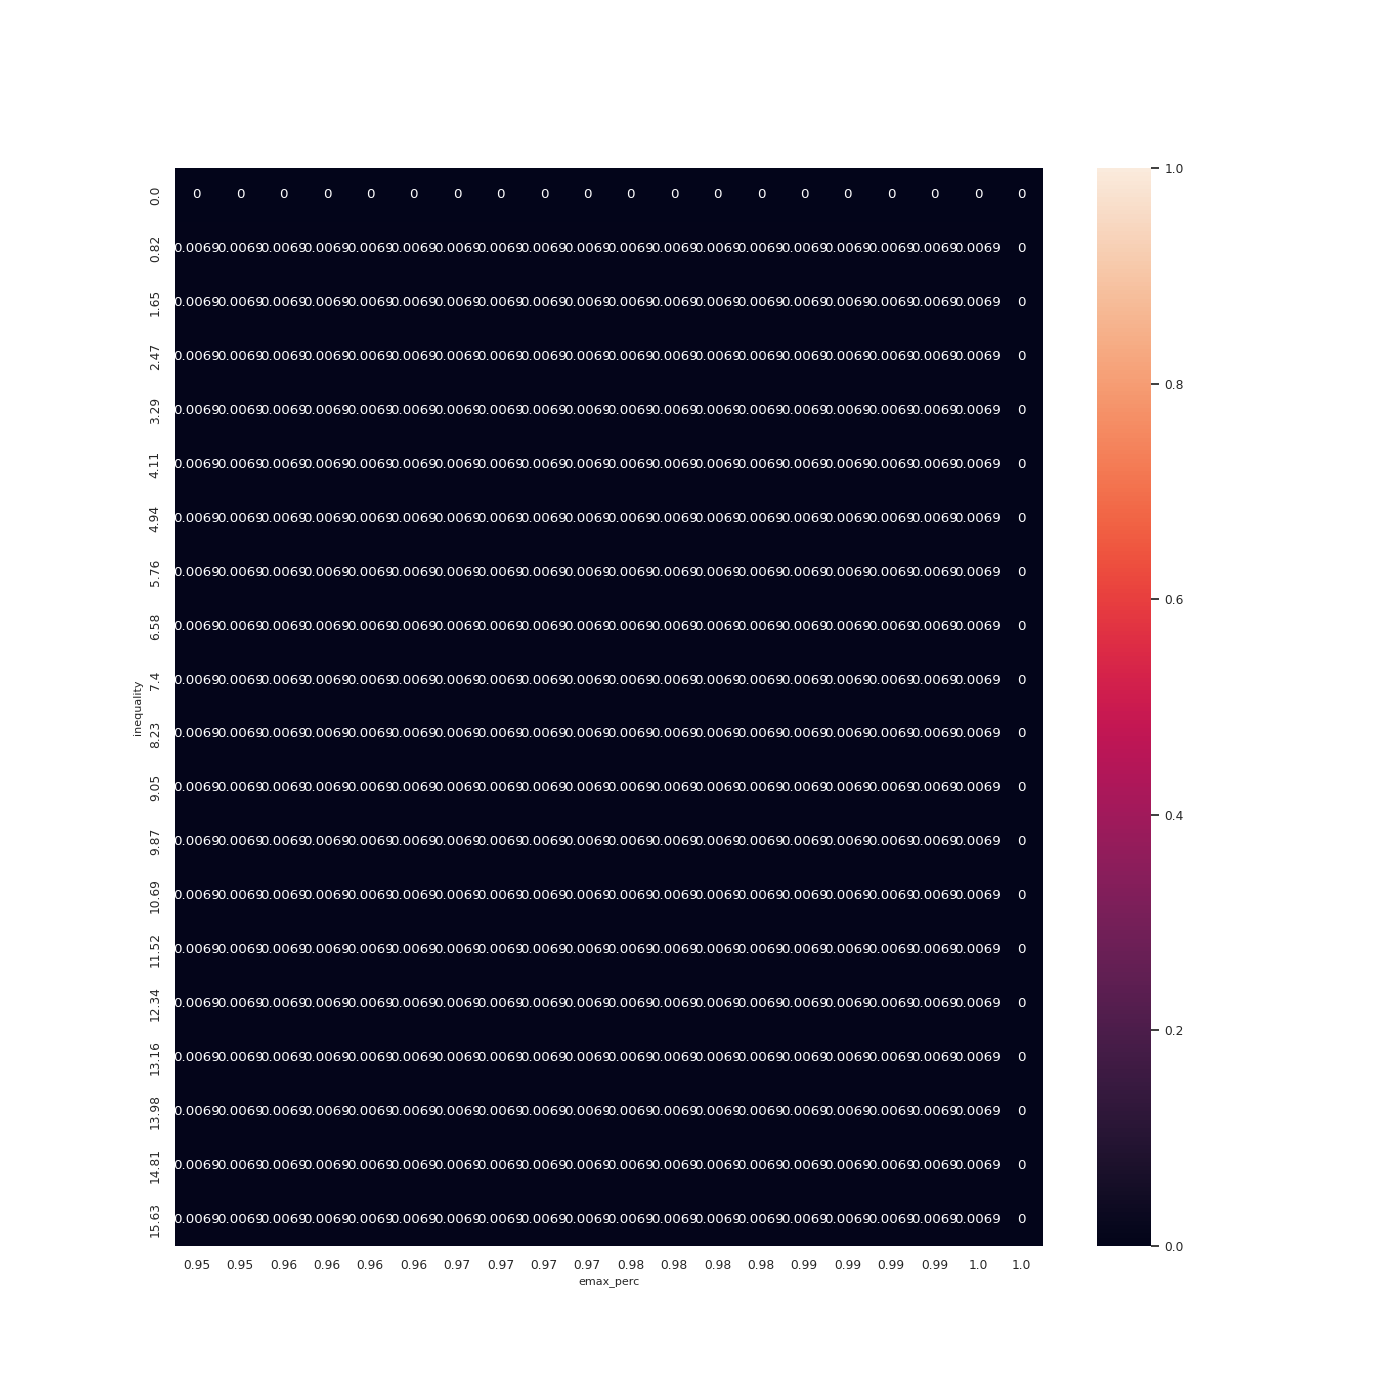

In [21]:
fig0, ax = plt.subplots(figsize=(14,14))
sns.heatmap(lalt, ax=ax, xticklabels=[str(round(i,2)) for i in y],yticklabels=[str(round(i,2)) for i in x], vmin=0,vmax=1,annot=lalt)
ax.set_ylabel('inequality',fontsize=8)
ax.set_xlabel('emax_perc',fontsize=8)

In [37]:
# Percent of segmented simulations
mx = df_tsne_res['inequality'].max()
mn = 0.95*mx
df_seg = df_tsne_res[(df_tsne_res['inequality']>mn) & (df_tsne_res['emax_perc']>0.95)]
df_seg.shape[0]/df.shape[0]

0.16435185185185186

In [40]:
# Percent of alternating simulations
mx = df_tsne_res['inequality'].max()
mn = 0.05*mx
df_alt = df_tsne_res[(df_tsne_res['inequality']<mn) & (df_tsne_res['emax_perc']>0.95)]
df_alt.shape[0]/df.shape[0]

0.006944444444444444

In [22]:
##Clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_max = 0
max_silh = -1.e6
for n_clusters in range(2,21):
    kmeans = KMeans(
        n_clusters=n_clusters, 
        random_state=0, 
        n_init='auto'
    ).fit(X_dat)

    silhouette_avg = silhouette_score(X_dat, kmeans.labels_)
    if silhouette_avg > max_silh:
        max_silh = silhouette_avg
        n_max = n_clusters
    print(n_clusters, silhouette_avg)

2 0.6579923735273047
3 0.6930775625328951
4 0.6993783007604442
5 0.6894700457893487
6 0.724438101298207
7 0.747566850884524
8 0.7530554389092051
9 0.7736711360092245
10 0.764734109949429
11 0.7684990611326321
12 0.7854897328101218
13 0.7898501761749565
14 0.7777076804960602
15 0.7818439991042221
16 0.7878487690208463
17 0.7954194988690496
18 0.8195831858672009
19 0.8163347970907241
20 0.8407559728427928


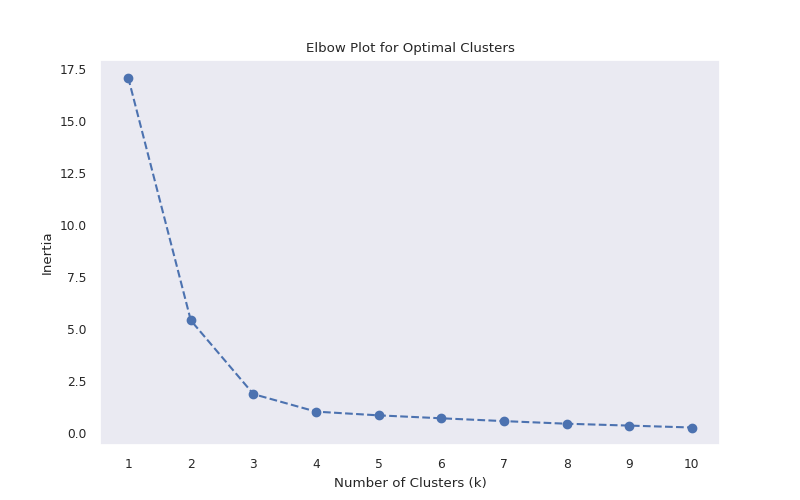

In [23]:
#from sklearn.datasets import make_blobs

## Generate synthetic data for demonstration
## Replace this with your actual dataset (X)
#X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Function to compute inertia for different numbers of clusters
def plot_elbow(X, max_clusters=10):
    inertia = []
    cluster_range = range(1, max_clusters + 1)

    # Compute K-Means for different cluster counts
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    # Plot the elbow plot
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, inertia, marker='o', linestyle='--')
    plt.title('Elbow Plot for Optimal Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(cluster_range)
    plt.grid()
    plt.show()

# Call the function to plot the elbow
plot_elbow(X_dat, max_clusters=10)

In [24]:
kmeans = KMeans(
        n_clusters=4, 
        random_state=0, 
        n_init='auto'
    ).fit(X_dat)

df_tsne_res['kmeans'] = kmeans.labels_

In [25]:
df_tsne_res.to_csv("tsne_params.csv",index=False)

## Plot results

In [26]:
lab1 = 'entropy'
lab2 = 'emax_perc'
lab3 = 'inequality'
lab4 = 'kmeans'

In [27]:
#idx = 449
#point = [df_tsne_res['tsne_1'][idx], df_tsne_res['tsne_2'][idx]]
#point

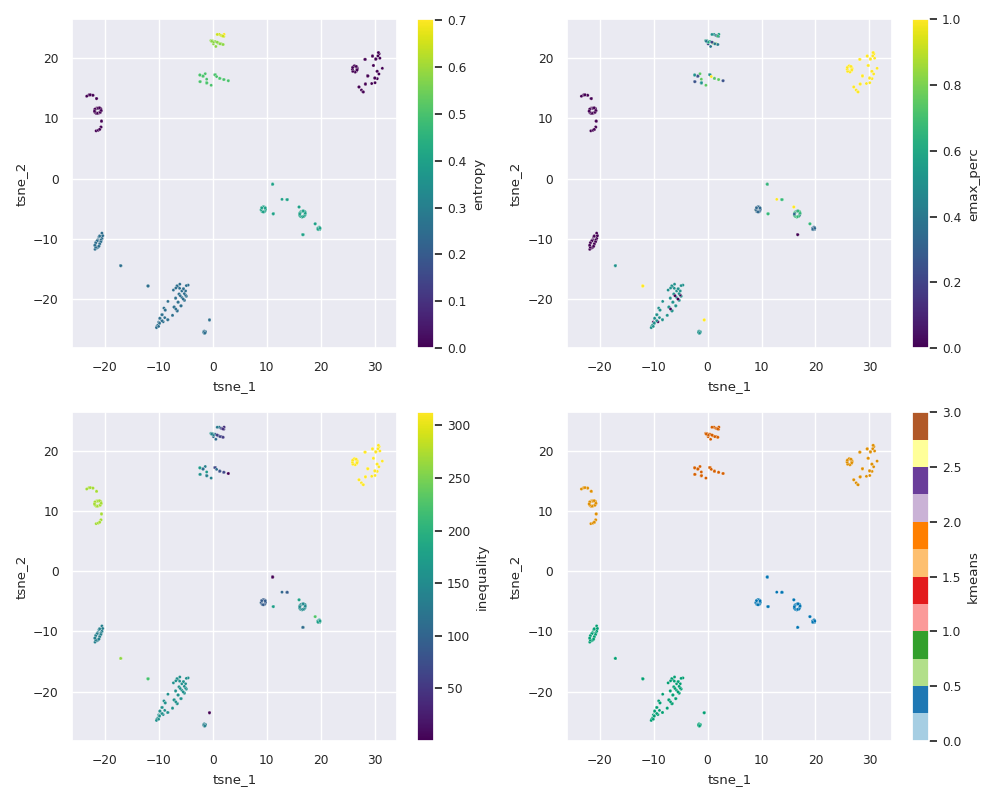

In [28]:
#2D plots
fig1, axis = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

ax1 = sns.scatterplot(data=df_tsne_res, ax=axis[0][0], x='tsne_1', y='tsne_2', hue=lab1, palette='viridis',s=5)
norm1 = plt.Normalize(df_tsne_res[lab1].min(), df_tsne_res[lab1].max())
sm1 = plt.cm.ScalarMappable(cmap="viridis", norm=norm1)
sm1.set_array([])
ax1.get_legend().remove()
cb1 = plt.colorbar(mappable=sm1, ax=ax1)
cb1.set_label(lab1)

ax2 = sns.scatterplot(data=df_tsne_res, ax=axis[0][1], x='tsne_1', y='tsne_2', hue=lab2, palette='viridis',s=5)
norm2 = plt.Normalize(df_tsne_res[lab2].min(), df_tsne_res[lab2].max())
sm2 = plt.cm.ScalarMappable(cmap="viridis", norm=norm2)
sm2.set_array([])
ax2.get_legend().remove()
cb2 = plt.colorbar(mappable=sm2, ax=ax2)
cb2.set_label(lab2)

ax3 = sns.scatterplot(data=df_tsne_res, ax=axis[1][0], x='tsne_1', y='tsne_2', hue=lab3, palette='viridis',s=5)
norm3 = plt.Normalize(df_tsne_res[lab3].min(), df_tsne_res[lab3].max())
sm3 = plt.cm.ScalarMappable(cmap="viridis", norm=norm3)
sm3.set_array([])
ax3.get_legend().remove()
cb3 = plt.colorbar(mappable=sm3, ax=ax3)
cb3.set_label(lab3)

ax4 = sns.scatterplot(data=df_tsne_res, ax=axis[1][1], x='tsne_1', y='tsne_2', hue=lab4, palette='colorblind',s=5)
#sns.scatterplot(ax=axis[1][1], x=np.array([point[0]]), y=np.array([point[1]]), marker='x',color='b',s=100)
norm4 = plt.Normalize(df_tsne_res[lab4].min(), df_tsne_res[lab4].max())
sm4 = plt.cm.ScalarMappable(cmap="Paired", norm=norm4)
sm4.set_array([])
ax4.get_legend().remove()
cb4 = plt.colorbar(mappable=sm4, ax=ax4)
cb4.set_label(lab4)

plt.tight_layout()

In [29]:
#df_tsne_res[df_tsne_res['kmeans']==0]

# 3D

## t-sne

In [30]:
# # Get t-sne embeding with 3 dimensions
# tsne3 = TSNE(3,perplexity=30,random_state=123)
# tsne_result3 = tsne3.fit_transform(X_dat)
# tsne_result3.shape

In [31]:
# df_tsne_res3 = pd.DataFrame({'tsne_1': tsne_result3[:,0], 'tsne_2': tsne_result3[:,1], 'tsne_3': tsne_result3[:,2]})
# df_tsne_res3 = df_tsne_res3.join(df)
# df_tsne_res3.head()

## Plot results

In [32]:
# #3D plots

# fig = plt.figure(figsize=(14,14))
# ax1 = fig.add_subplot(2,2,1,projection='3d')
# fig.add_axes(ax1)
# sc1 = ax1.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab1], cmap='viridis')#, vmin=-200, vmax=200)
# ax1.set_xlabel('tsne_1')
# ax1.set_ylabel('tsne_2')
# ax1.set_zlabel('tsne_3')
# cbar1 = plt.colorbar(sc1)
# cbar1.set_label(lab1)

# ax2 = fig.add_subplot(2,2,2,projection='3d')
# fig.add_axes(ax2)
# sc2 = ax2.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab2], cmap='viridis')
# ax2.set_xlabel('tsne_1')
# ax2.set_ylabel('tsne_2')
# ax2.set_zlabel('tsne_3')
# cbar2 = plt.colorbar(sc2)
# cbar2.set_label(lab2)

# ax3 = fig.add_subplot(2,2,3,projection='3d')
# fig.add_axes(ax3)
# sc3 = ax3.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab3], cmap='viridis')
# ax3.set_xlabel('tsne_1')
# ax3.set_ylabel('tsne_2')
# ax3.set_zlabel('tsne_3')
# cbar3 = plt.colorbar(sc3)
# cbar3.set_label(lab3)

# ax4 = fig.add_subplot(2,2,4,projection='3d')
# fig.add_axes(ax4)
# sc4 = ax4.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab4], cmap='viridis')
# ax4.set_xlabel('tsne_1')
# ax4.set_ylabel('tsne_2')
# ax4.set_zlabel('tsne_3')
# cbar4 = plt.colorbar(sc4)
# cbar4.set_label(lab4)



# #plt.show()

In [33]:
#af = AffinityPropagation(damping=0.8,max_iter=3000,preference=-3, random_state=0).fit(X_dat)
#cluster_centers_indices = af.cluster_centers_indices_
#labels = af.labels_
#n_clusters = len(cluster_centers_indices)
#n_clusters, len(np.unique(labels))

In [34]:
##3D plot clustering
#lab = 'labels'

#fig0 = plt.figure(figsize=(8,8))
#ax = Axes3D(fig0)
#fig0.add_axes(ax)

#sc = ax.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=labels, cmap='Paired')#cmap='tab20')
#ax.set_xlabel('tsne_1')
#ax.set_ylabel('tsne_2')
#ax.set_zlabel('tsne_3')
#cbar = plt.colorbar(sc)
#cbar.set_label(lab)

##plt.show()

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.datasets import make_classification

# # Generate synthetic data for demonstration
# # Replace this with your actual dataset
# X, y = make_classification(
#    n_samples=1000,
#    n_features=5,
#    n_informative=3,
#    n_classes=3,
#    n_clusters_per_class=1,
#    random_state=42
# )

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dat, kmeans.labels_, test_size=0.3, random_state=42)

# Initialize the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.06      0.11        35
           1       1.00      1.00      1.00        31
           2       0.55      1.00      0.71        40
           3       1.00      1.00      1.00        24

    accuracy                           0.75       130
   macro avg       0.89      0.76      0.70       130
weighted avg       0.86      0.75      0.67       130


Confusion Matrix:
[[ 2  0 33  0]
 [ 0 31  0  0]
 [ 0  0 40  0]
 [ 0  0  0 24]]


/home/carlos/python/environments/vfarol/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [36]:
model.coef_

array([[ 0.82220714, -0.57406968,  2.60590963],
       [-0.61475275,  0.29277945, -7.77360546],
       [-0.7144073 ,  0.82783914, -0.74395445],
       [ 0.50695291, -0.54654892,  5.91165028]])